In [1]:
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# Import Data

In [2]:
def get_data(stocks, start ,end):
    stockData = pdr.get_data_yahoo(stocks,start,end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()    #makes the most difference for MC
    return meanReturns,covMatrix

stockList = ['TSLA','AAPL','GS','MSFT','F','DELL','XOM']
stocks = [stock for stock in stockList]

endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=600)

meanRets,covarianceMat = get_data(stocks,startDate,endDate)
print(meanRets)
print(covarianceMat)

Symbols
TSLA    0.001964
AAPL    0.000660
GS      0.001197
MSFT    0.000603
F       0.001952
DELL    0.000747
XOM     0.002523
dtype: float64
Symbols      TSLA      AAPL        GS      MSFT         F      DELL       XOM
Symbols                                                                      
TSLA     0.001411  0.000348  0.000136  0.000291  0.000286  0.000190  0.000033
AAPL     0.000348  0.000339  0.000094  0.000221  0.000157  0.000138  0.000025
GS       0.000136  0.000094  0.000300  0.000072  0.000246  0.000131  0.000173
MSFT     0.000291  0.000221  0.000072  0.000271  0.000121  0.000121  0.000007
F        0.000286  0.000157  0.000246  0.000121  0.000775  0.000199  0.000198
DELL     0.000190  0.000138  0.000131  0.000121  0.000199  0.000336  0.000100
XOM      0.000033  0.000025  0.000173  0.000007  0.000198  0.000100  0.000480


# Define weights of the portfolio

In [3]:
weights = np.random.random(len(meanRets)) # randomly assigns weights to each security in our portfolio
weights /= np.sum(weights) #makes sure sum of weights = 1
print('{x},'.format(x=weights))
print(sum(weights))

[0.26016413 0.1200802  0.24178372 0.03825692 0.03010954 0.2990734
 0.01053209],
1.0


# Monte Carlo Simulation

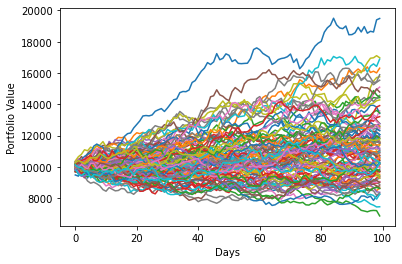

In [6]:
mc_sims = 100
T = 100 #timeframe in days
meanM = np.full(shape=(T,len(weights)), fill_value=meanRets)
meanM = meanM.T

portfolio_sims = np.full(shape=(T,mc_sims),fill_value=0.0)

initialPortfolio = 10000

for m in range(0,mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covarianceMat)
    dailyReturns = meanM + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights,dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')

plt.show()